In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/drive/MyDrive/datasets/Walmart.csv")

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [20]:
#statistics summary
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00.000000256,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


# Visualizations

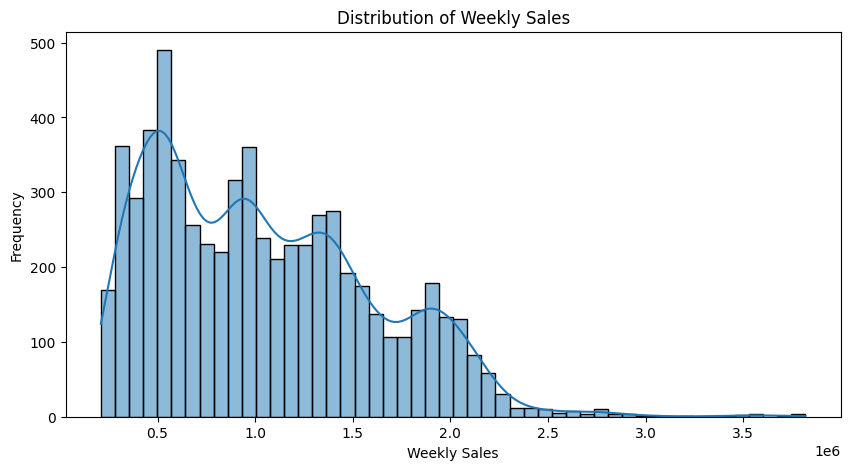

In [9]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

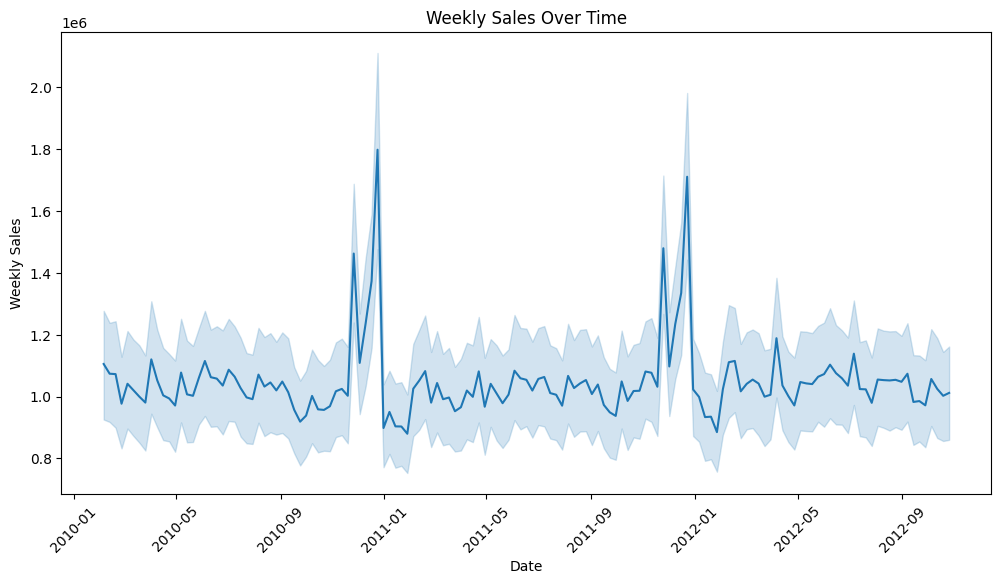

In [11]:
# Sales trend over time
plt.figure(figsize=(12, 6))
#The format was specified for the conversion to work properly
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Convert Date column to datetime
df.sort_values('Date', inplace=True)
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()

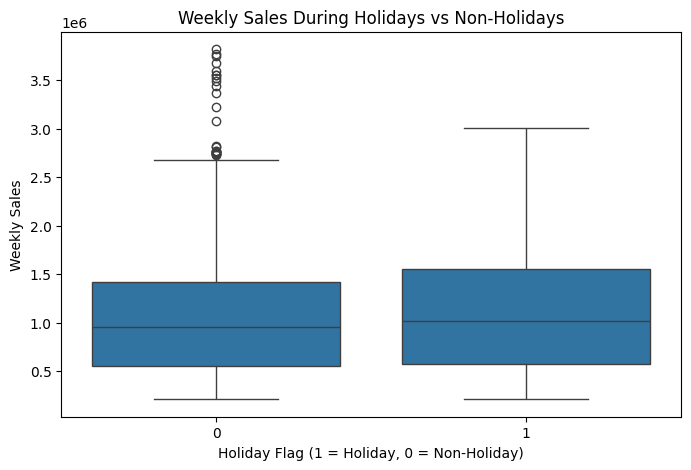

In [12]:
# Sales comparison during holidays vs non-holidays
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Weekly Sales During Holidays vs Non-Holidays")
plt.xlabel("Holiday Flag (1 = Holiday, 0 = Non-Holiday)")
plt.ylabel("Weekly Sales")
plt.show()

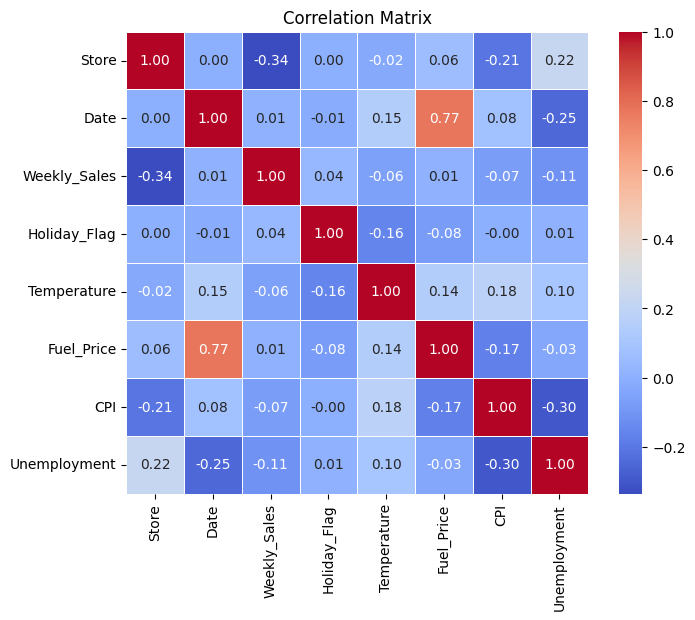

In [13]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, square=True)
plt.title("Correlation Matrix")
plt.show()

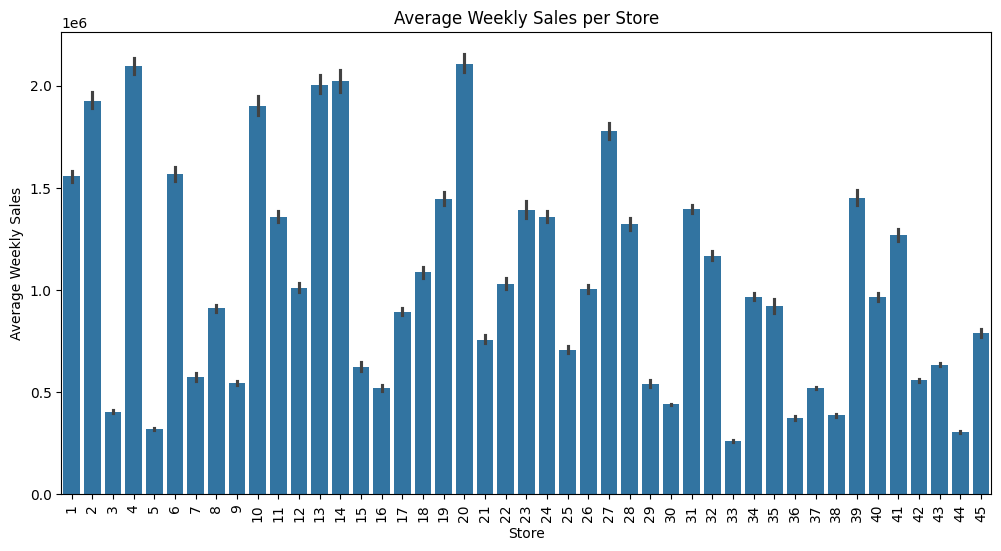

In [17]:
# Barplot for average weekly sales per store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df, estimator=np.mean)
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.show()

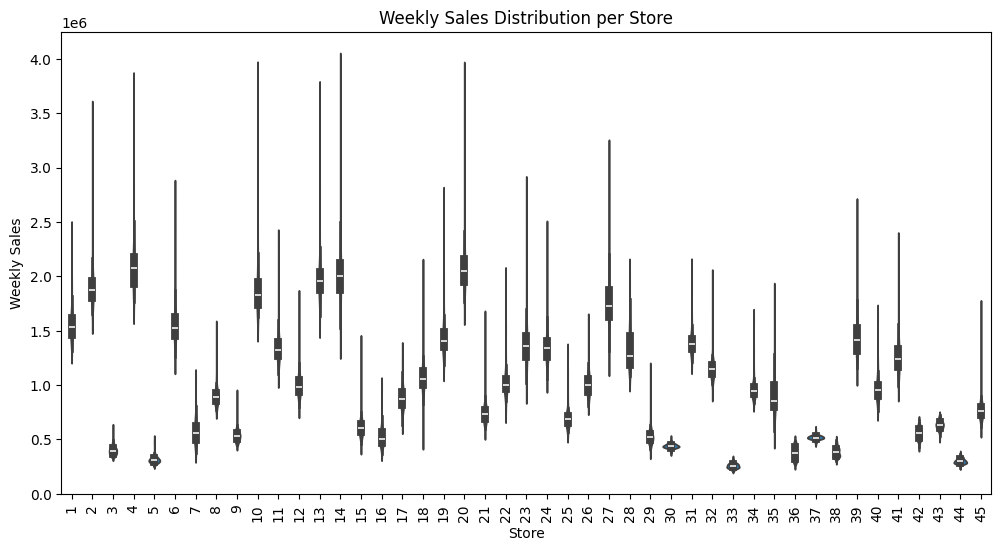

In [18]:
# Violin plot for Weekly Sales distribution across Stores
plt.figure(figsize=(12, 6))
sns.violinplot(x='Store', y='Weekly_Sales', data=df)
plt.title("Weekly Sales Distribution per Store")
plt.xlabel("Store")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=90)
plt.show()

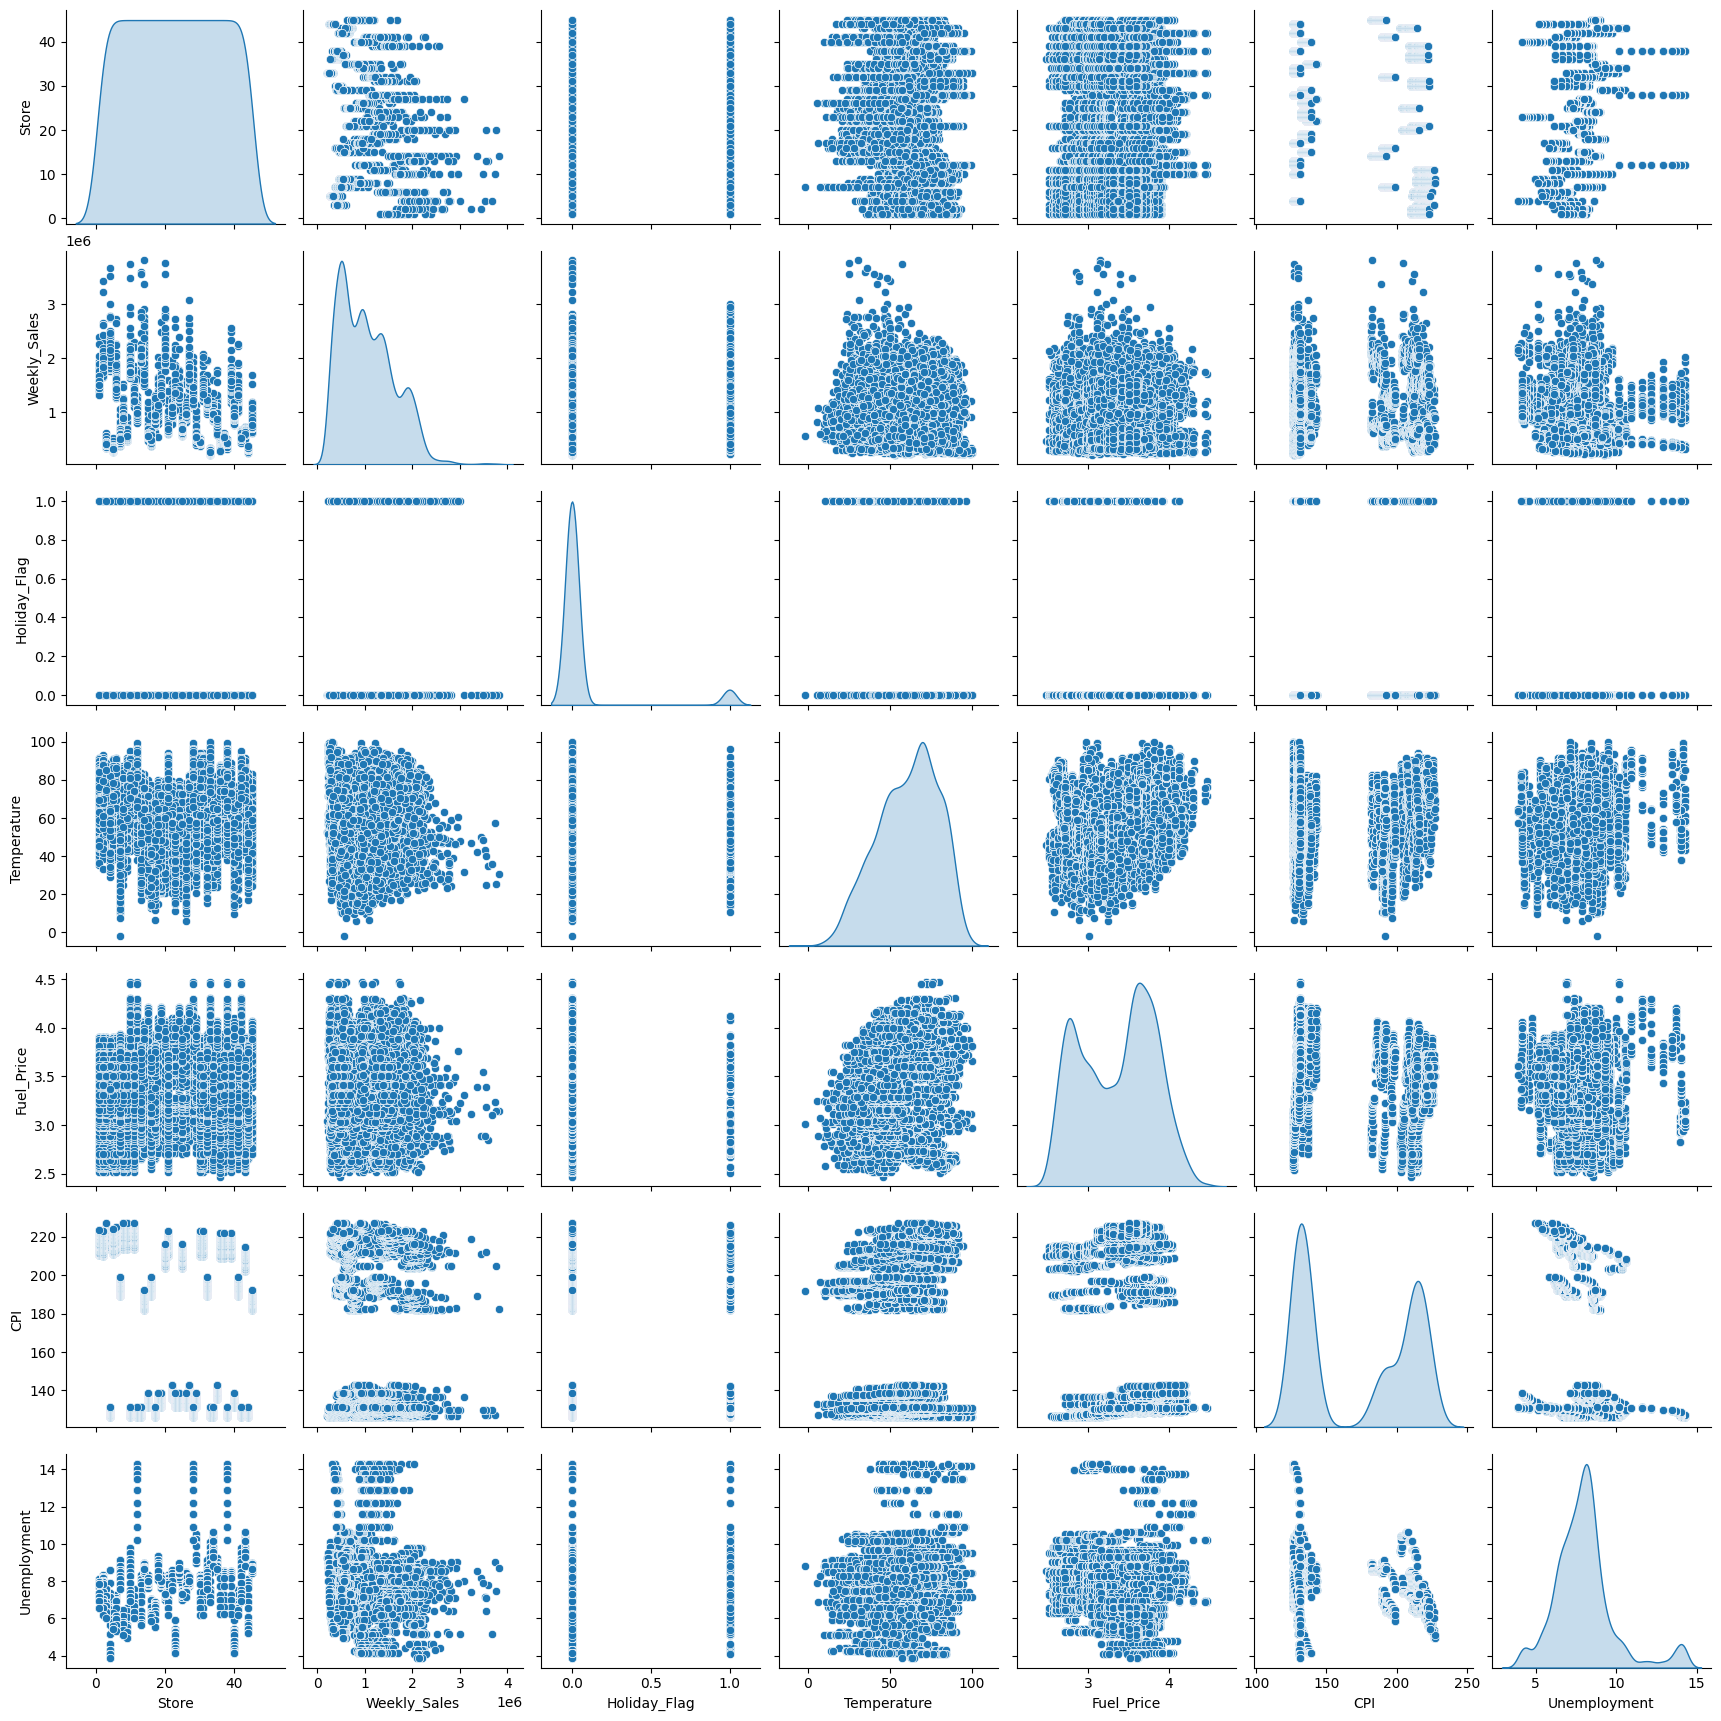

In [16]:
# Pairplot for overall feature relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

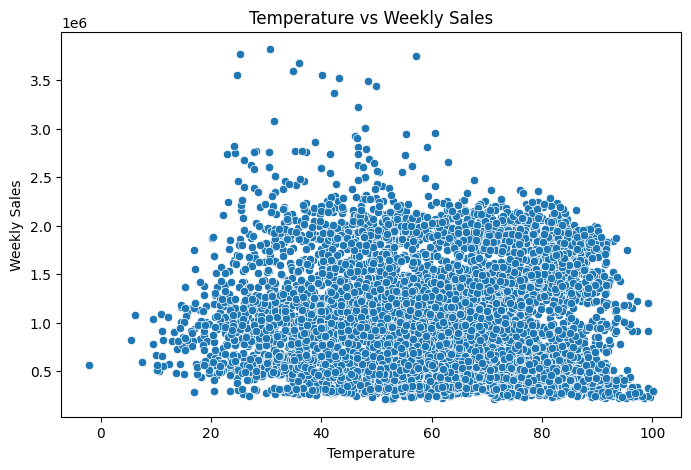

In [14]:
# Relationship between Temperature and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

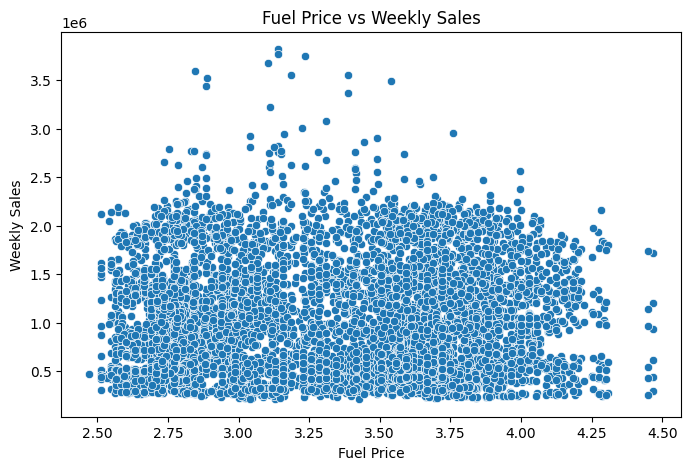

In [15]:
# Fuel Price vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title("Fuel Price vs Weekly Sales")
plt.xlabel("Fuel Price")
plt.ylabel("Weekly Sales")
plt.show()